# DFT periodischer Signale mit Python
In diesem Notebook zur gleichnamigen Übungsaufgabe wird gezeigt, wie man das Spektrum periodischer Signale berechnet. Als Beispiel nehmen wir

$$y(t) = 1 + 0,5\sin(2 \pi t \cdot \text{1 kHz}) + 0,2\cos(2 \pi t \cdot \text{1,1 kHz})$$

In [5]:
import os, sys
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
    
import matplotlib.pyplot as plt
%matplotlib inline
import dsp_fpga_lib as dsp # import and set plot properties
import numpy as np
from numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq

np.set_printoptions(threshold=20) # for > 20 items, print with (1,2, ... , 99, 100)
import scipy.signal as sig

figsize = {"figsize": (12,5), "facecolor":"w"}

Wir starten mit folgendem Python-Skript:

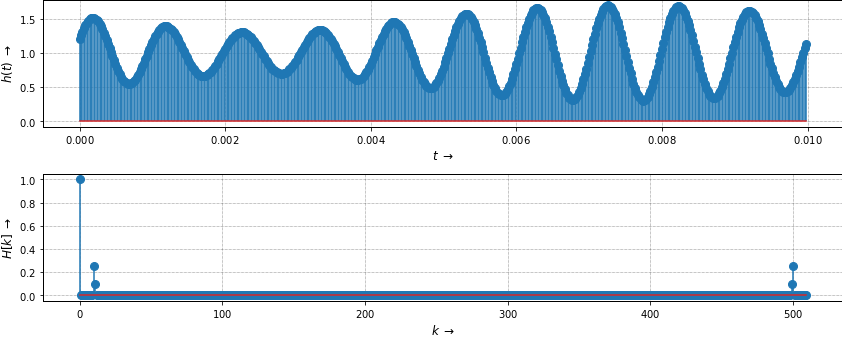

In [12]:
f_S = 51e3; T_S = 1. / f_S
N_FFT = 510; t_max = N_FFT * T_S
f_a = 1e3; f_b = 1.1e3
t = np.arange(0, t_max, T_S)
y = 1 + 0.5* np.sin(2*np.pi*t*f_a) + 0.2 * np.cos(2*np.pi*t*f_b)
Sy = np.fft.fft(y,N_FFT)/N_FFT
f = np.arange(N_FFT)

fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, **figsize)
ax1.stem(t, y, use_line_collection=True)
ax1.set_xlabel(r"$t \; \rightarrow$")
ax1.set_ylabel(r"$h(t) \; \rightarrow$")
ax2.stem(f, abs(Sy), use_line_collection=True) 
ax2.set_xlabel(r"$k \; \rightarrow$")
ax2.set_ylabel(r"$H[k] \; \rightarrow$")

fig1.set_tight_layout(True)

### Aufgaben

- Skalieren Sie die DFT so, dass die Frequenzachse stimmt und die berechneten Leistungen im Zeit- und Frequenzbereich identisch sind.

# Musterlösung

Zeitbereich: P =  1.1450000000000002
Frequenzbereich: P =  (1.145+0j)


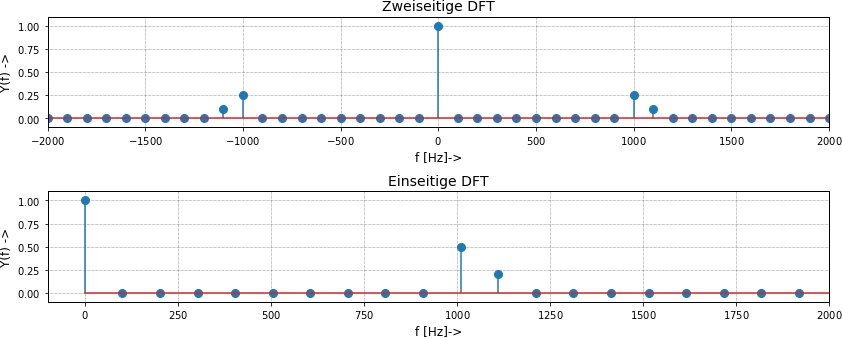

In [13]:
f_S = 1e4; T_S = 1/f_S
N_FFT = 100; T_mess = N_FFT * T_S
f_a = 1e3; f_b = 1.1e3; DC = 1.
t = np.arange(0, T_mess, T_S) # start / stop / step
y = DC + 0.5 * np.sin(2 * np.pi * t * f_a)\
      + 0.2 * np.cos(2 * np.pi * t * f_b)
print ('Zeitbereich: P = ', np.sum(y**2) * T_S / T_mess)

fig2, (ax21,ax22) = plt.subplots(2,1, **figsize) # two-sided spectrum
Sy = fft(y, N_FFT) / N_FFT # calculate DFT at
# f = [0 ... f_S[ = [0... f_S/2[, [-f_S/2 ... 0[
f = fftfreq(N_FFT, T_S)
# freq. points at [0... f_S/2[, [-f_S/2 ... 0[
ax21.stem(f,abs(Sy), use_line_collection=True); ax21.grid(True)
ax21.set_xlim(-2000, 2000); ax21.set_ylim(-0.1, 1.1)
ax21.set_xlabel('f [Hz]->'); ax21.set_ylabel('Y(f) ->');
ax21.set_title('Zweiseitige DFT')
print ('Frequenzbereich: P = ', np.dot(Sy,Sy.conj().T))
# one-sided spectrum [0 ... f_S/2[
Sy = 2 * fft(y, N_FFT) / N_FFT # ... needs x2
Sy[0] = Sy[0] / 2. # adjust DC scaling
f = np.linspace(0, f_S, N_FFT) # f = 0 ... f_S[
ax22.stem(f[0:N_FFT//2],abs(Sy[0:N_FFT//2]), use_line_collection=True) #.. f_S/2[
ax22.set_xlabel('f [Hz]->'); ax22.set_ylabel('Y(f) ->')
ax22.axis([-100,2000,-0.1, 1.1]); ax22.grid(True)
ax22.set_title('Einseitige DFT')
fig2.set_tight_layout(True); 

### Fragen und Experimente
- Analysieren Sie den Simulationsfile xxx mit einer DFT, versuchen Sie möglichst gut die Frequenz zu treffen

- Analysieren Sie den File mit Wähltönen, welche Nummer wurde gewählt?

***
### Copyright

(c) 2016 - 2020 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources), feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2020*.